**Import** **Library**

In [3]:
import pandas as pd


In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

**Import Data**

In [7]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [8]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [10]:
df.duplicated('CustomerId').sum()

0

In [11]:
df = df.set_index('CustomerId')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


**Encoding**

In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df.replace({'Geography': {'France': 2, 'Germany':1, 'Spain' :0}}, inplace=True)

In [15]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
df.replace({'Gender': {'Male': 0, 'Female':1}}, inplace=True)

In [17]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [18]:
df.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1 }}, inplace=True)

In [19]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [20]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [21]:
df.loc[(df['Balance']==0), 'Churn'].value_counts( )

0    3117
1     500
Name: Churn, dtype: int64

In [22]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

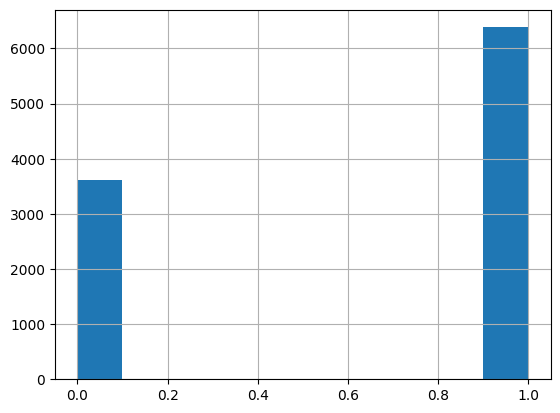

In [23]:
df['Zero Balance'].hist()

In [24]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [25]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [26]:
X = df.drop(['Surname','Churn'], axis = 1)

In [27]:
y = df['Churn']

In [28]:
X.shape, y.shape

((10000, 11), (10000,))

In [29]:
df['Churn'].value_counts()


0    7963
1    2037
Name: Churn, dtype: int64

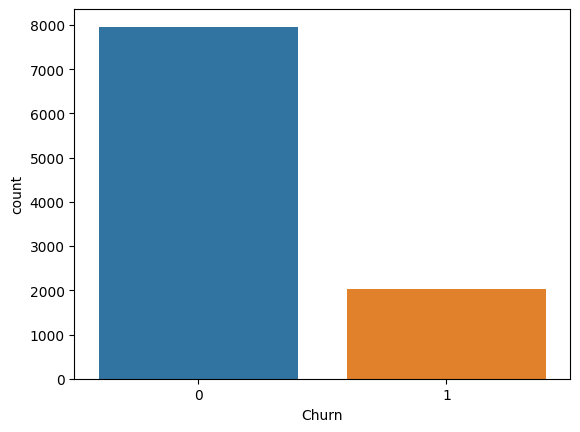

In [30]:
sns.countplot(x ='Churn', data = df);

In [31]:
X.shape, y.shape

((10000, 11), (10000,))

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

**Standardize Features**

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()

**Standardize Original Data**

In [36]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [37]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier()

In [40]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred = rfc.predict(X_test)

**SVM(Support Vector Machine Classifier)**

In [42]:
from sklearn.svm import SVC

In [43]:
svc = SVC()

In [44]:
svc.fit(X_train, y_train)

SVC()

In [45]:
y_pred1 = svc.predict(X_test)

**Model Accuracy**

In [46]:
from sklearn.metrics import confusion_matrix, classification_report


In [47]:
confusion_matrix(y_test, y_pred1)

array([[2374,   45],
       [ 421,  160]])

In [48]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



In [49]:
from sklearn.metrics import accuracy_score

In [50]:
score = accuracy_score(y_test, y_pred1)

In [51]:
print("Accuracy Score :", score*100, "%")

Accuracy Score : 84.46666666666667 %


**Model Accuracy**

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
confusion_matrix(y_test, y_pred)

array([[2339,   80],
       [ 359,  222]])

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2419
           1       0.74      0.38      0.50       581

    accuracy                           0.85      3000
   macro avg       0.80      0.67      0.71      3000
weighted avg       0.84      0.85      0.83      3000



In [55]:
from sklearn.metrics import accuracy_score

In [56]:
score = accuracy_score(y_test, y_pred)

In [57]:
print("Accuracy Score :", score*100, "%")

Accuracy Score : 85.36666666666667 %


Text(0.5, 1.0, 'Accuracy Score: 0.8536666666666667')

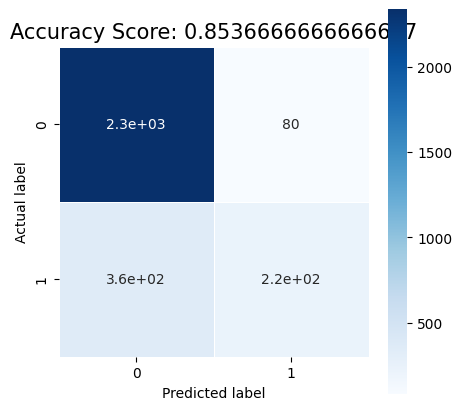

In [58]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

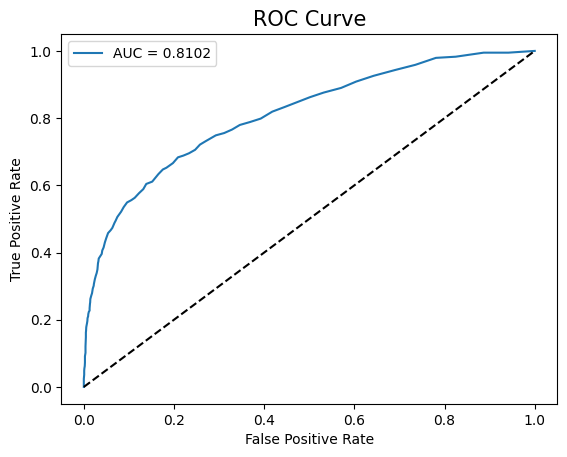

In [60]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

**Visualization for SVM**

Text(0.5, 1.0, 'Accuracy Score: 0.8446666666666667')

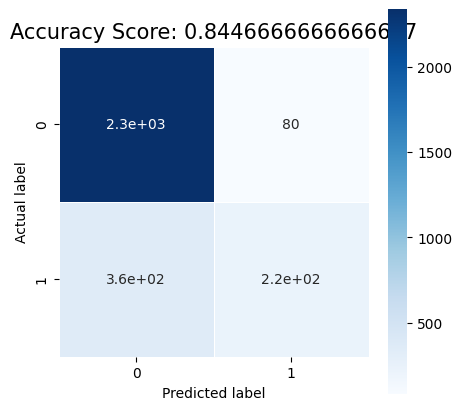

In [61]:
cm1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(svc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [66]:
import pickle
file = 'Customer_Churn_Prediction.pkl'
pickle.dump(rfc, open(file, 'wb'))

In [67]:
load_model = pickle.load(open(file, 'rb'))

In [68]:
y_prep = load_model.predict(X_test)

In [69]:
y_prep

array([0, 0, 0, ..., 1, 0, 1])